Frame 4: 269 trajectories present.


ValueError: max() arg is an empty sequence

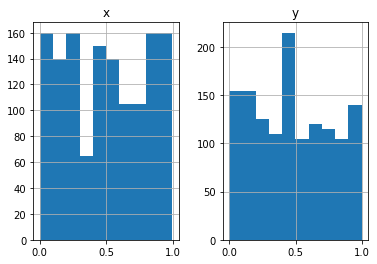

In [8]:
# import numpy as np
# import pandas as pd
# import trackpy as tp
# import matplotlib  as mpl
# import matplotlib.pyplot as plt
# from skimage.feature import peak_local_max
# from scipy import ndimage
# from skimage.feature import blob_log
# from skimage import feature
# from scipy.stats.stats import pearsonr 
# import os
# import scipy
# import scipy.ndimage as ndimage
# from skimage import measure
# from skimage.color import rgb2gray 
# import probfit 
  
# #from pims import TiffStack
# import time
# import matplotlib.patches 
# from skimage import morphology, util, filters

import soren_tracking
import importlib
importlib.reload(soren_tracking)
from soren_tracking import *



# --------------------------- SET VARIABLES ---------------------------- #

mean_multiplier = 0.8

sep = 5                 #pixel seperation, ahould be close t search_range
object_size = 9         # 5 originally 
lip_int_size = 9        #originally 14 for first attemps
lip_BG_size = 60        # originally 50 for first attemps

# Tracking parameters
memory = 1              #frame
search_range = 5        # pixels

duration_filter = 20    # frames, originally 5

tracking_time = 0.036   #s --> maybe should change according to exposue 

pixel_size = 0.18333    #µm 60x is 18333 nm
#pixel_size = 0.2666    #µm for EMCDD

# change duration min in lineio
# change microns_per_pixel in line

# path to test video
#vid_name =  '/Volumes/AGENT SMITH/Sara/05MAY22/Lys/488/vids/Process_8962_488.tif'
#video = image_loader_video(vid_name)

#actual data paths and save_path
exp_type_folders    = ['sample_vids/']
exp_types           = ['HEK_RC_NovoEarly_488_30min']       # experiment type for given folder before
                                             # For column in csv file to classify data
save_path =  'sample_output/'        # where to save .csv

#background blue cahnnel
#background = '/Volumes/Annette/Spinning_disk/Folder_20210729_HELA_lys/tiff/cellmask_ins/488/Process_4542_488.tif'
#img = image_loader_video(background)
#img = img[0]
#img =  ndimage.gaussian_filter(img,sigma =(1.5,1.5)) # smooting 
#mpl.rc('figure',  figsize=(10, 6))
#mpl.rc('image', cmap='gray')

# -------------------------------- Running ------------------------------------ #

list_of_vids = []
type_list = []
replica_list = []


for main_folder in range(len(exp_type_folders)):
    file_paths,relica_number,exp_type = create_list_of_vids(exp_type_folders[main_folder],exp_types[main_folder])
    list_of_vids.extend(file_paths)
    type_list.extend(exp_type)
    replica_list.extend(relica_number)  

print(list_of_vids)


for i in range(len(list_of_vids)):
    save_path1 = save_path
    path = list_of_vids[i]
    lipase = type_list[i]
    replica = replica_list[i]
    runner_tracker(path,lipase,save_path1,replica)


create_big_df(save_path) # saving data


In [14]:
exp_types[main_folder]

'HEK_RC_NovoEarly_488_30min'

In [15]:
importlib.reload(soren_tracking)
from soren_tracking import *

In [5]:
from PIL import Image, ImageSequence
import PIL

In [6]:
def first_n_frames(impath, n):
    im = Image.open(impath)
    imlist = []
    for i, page in zip(range(n), ImageSequence.Iterator(im)):
        imlist.append(page)
    outname = impath.split('.')[0] + f"_first{n}.tif"
    with PIL.TiffImagePlugin.AppendingTiffWriter(outname, True) as tf:
        for img in imlist:
            img.save(tf)
            tf.newFrame()

In [7]:
from os.path import join
curdir, _, files = next(os.walk("sample_vids"))
[first_n_frames(join(curdir, file), 5) for file in files if file.endswith(".tif")]

[None]